In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../Resources/total_combined_data.csv')
data = data[data["year"]>=2016]
cols = list(data.columns.values)

data = data[["name","position","height_inches","weight","player_age","draft_round","game_location",'total_passing_fantasy_points', 'total_rushing_fantasy_points', 'total_receiving_fantasy_points', 'total_other_fantasy_points', 'total_combined_fantasy_points']]
data["draft_round"] = data["draft_round"].fillna(8.0)
data.head()

,name,position,height_inches,weight,player_age,draft_round,game_location,total_passing_fantasy_points,total_rushing_fantasy_points,total_receiving_fantasy_points,total_other_fantasy_points,total_combined_fantasy_points
79,MyCole Pruitt,TE,74.0,251.0,9049.000000,5.0,A,0.0,0.0,1.6,0,1.6
80,MyCole Pruitt,TE,74.0,251.0,8988.333333,5.0,H,0.0,0.0,1.7,0,1.7
120,Emmanuel Sanders,WR,71.0,186.0,10829.500000,3.0,A,0.0,0.4,120.0,0,120.4
121,Emmanuel Sanders,WR,71.0,186.0,10822.625000,3.0,H,0.0,0.0,92.2,0,92.2
122,Emmanuel Sanders,WR,71.0,186.0,11184.500000,3.0,A,0.0,0.0,22.7,0,22.7


In [3]:
qb_mm = data[data["position"]=="QB"]
qbmin = qb_mm["total_combined_fantasy_points"].min()
qbmax = qb_mm["total_combined_fantasy_points"].max()
print(f"Lowest Score is {qbmin}")
print(f"Highest Score is {qbmax}")
#what if we take out values where QB averaged fewer than 4 fantasy points per game?
#4 points per game * 8 home/away games =32
qb_mm_nz = qb_mm[qb_mm["total_combined_fantasy_points"]>32]


Lowest Score is -6.96
Highest Score is 275.44


(253, 4) (253, 1)
Training Score: 0.18982252088697538
Testing Score: 0.14642838069562758


Text(0.5, 1.0, 'QBs including Height, Weight, Age, and Draft Round')

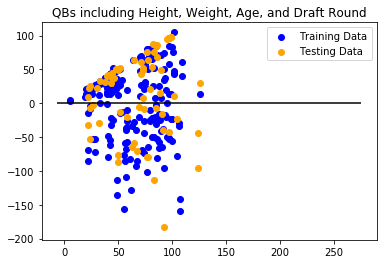

In [4]:
#quarterbacks all variables
qbs = data[data["position"]=="QB"]
X = qbs[["height_inches","weight","player_age","draft_round"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("QBs including Height, Weight, Age, and Draft Round")

(135, 4) (135, 1)
Training Score: 0.11538667020884397
Testing Score: -0.01486922421220882


Text(0.5, 1.0, 'nzQBs including Height, Weight, Age, and Draft Round')

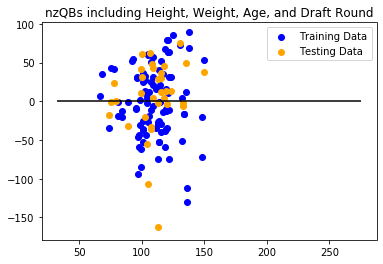

In [5]:
# 4ppg
#quarterbacks all variables
qbs = qb_mm_nz[qb_mm_nz["position"]=="QB"]
X = qbs[["height_inches","weight","player_age","draft_round"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("nzQBs including Height, Weight, Age, and Draft Round")

(253, 2) (253, 1)
Training Score: 0.1348351787192038
Testing Score: 0.09265717855646105


Text(0.5, 1.0, 'QBs including Age and Draft Round')

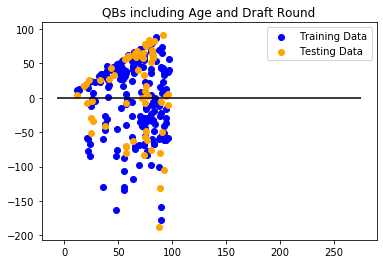

In [6]:
#quarterbacks age and draft round
qbs = data[data["position"]=="QB"]
X = qbs[["player_age","draft_round"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("QBs including Age and Draft Round")

(135, 2) (135, 1)
Training Score: 0.057326169165024865
Testing Score: 0.031275189324331265


Text(0.5, 1.0, 'nzQBs including Age and Draft Round')

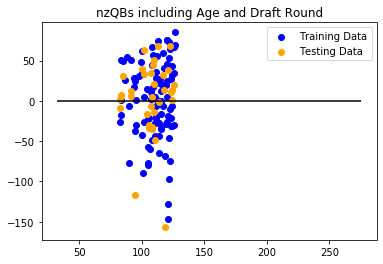

In [7]:
#4ppg quarterbacks age and draft round
qbs = qb_mm_nz[qb_mm_nz["position"]=="QB"]
X = qbs[["player_age","draft_round"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("nzQBs including Age and Draft Round")

(253, 2) (253, 1)
Training Score: 0.025611907298987324
Testing Score: 0.03931938157264325


Text(0.5, 1.0, 'QBs including Age and Height')

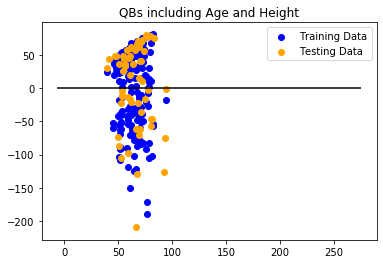

In [8]:
#quarterbacks age and height
qbs = data[data["position"]=="QB"]
X = qbs[["player_age","height_inches"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("QBs including Age and Height")

(135, 2) (135, 1)
Training Score: 0.03117711826281666
Testing Score: -0.09884053835018314


Text(0.5, 1.0, 'QBs including Age and Height')

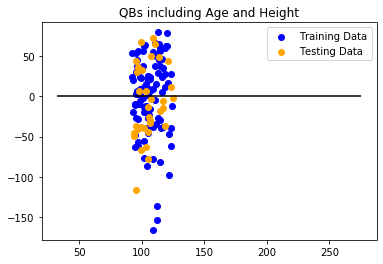

In [9]:
#4ppg quarterbacks age and height
qbs = qb_mm_nz[qb_mm_nz["position"]=="QB"]
X = qbs[["player_age","height_inches"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("QBs including Age and Height")

(253, 2) (253, 1)
Training Score: 0.012505266044241403
Testing Score: -0.0036684121035874817


Text(0.5, 1.0, 'QBs including Weight and Height')

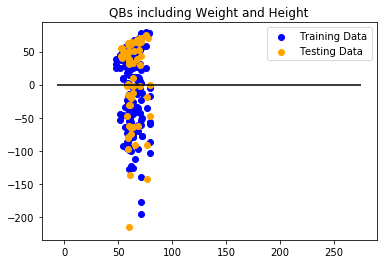

In [10]:
#quarterbacks weight and height
qbs = data[data["position"]=="QB"]
X = qbs[["weight","height_inches"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("QBs including Weight and Height")

(135, 2) (135, 1)
Training Score: 0.00264326521257241
Testing Score: 0.012514162170673249


Text(0.5, 1.0, 'QBs including Age and Height')

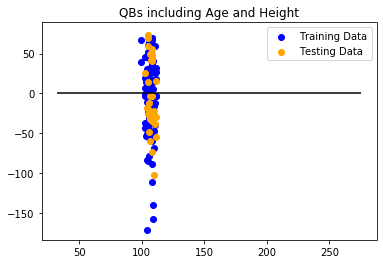

In [11]:
#4ppg quarterbacks weight and height
qbs = qb_mm_nz[qb_mm_nz["position"]=="QB"]
X = qbs[["weight","height_inches"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("QBs including Age and Height")

(575, 4) (575, 1)
Training Score: 0.1938530404830051
Testing Score: 0.207150201969877


Text(0.5, 1.0, 'RBs including Height, Weight, Age, and Draft Round')

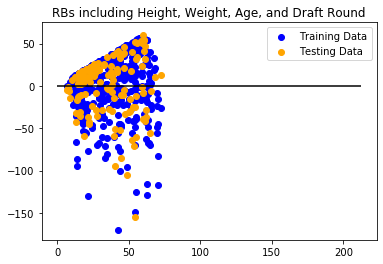

In [12]:
#running backs all variables
rbs = data[data["position"]=="RB"]
X = rbs[["height_inches","weight","player_age","draft_round"]]
y = rbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("RBs including Height, Weight, Age, and Draft Round")

In [13]:
rb_mm = data[data["position"]=="RB"]
qbmin = rb_mm["total_combined_fantasy_points"].min()
qbmax = rb_mm["total_combined_fantasy_points"].max()
print(f"Lowest Score is {qbmin}")
print(f"Highest Score is {qbmax}")
#what if we take out values where QB averaged fewer than 4 fantasy points per game?
#4 points per game * 8 home/away games =32
rb_mm_nz = rb_mm[rb_mm["total_combined_fantasy_points"]>32]

Lowest Score is -0.4
Highest Score is 212.5


(230, 4) (230, 1)
Training Score: 0.129030901687184
Testing Score: 0.06510289641538136


Text(0.5, 1.0, 'nzRBs including Height, Weight, Age, and Draft Round')

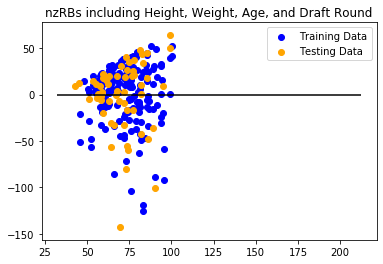

In [14]:
# 4ppg
#quarterbacks all variables
rbs = rb_mm_nz[rb_mm_nz["position"]=="RB"]
X = rbs[["height_inches","weight","player_age","draft_round"]]
y = rbs["total_combined_fantasy_points"].values.reshape(-1, 1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("nzRBs including Height, Weight, Age, and Draft Round")